In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv('mz_final.csv')
df['date'] = df.event_timestamp.str.split(' ').str[0]
df['time'] = df.event_timestamp.str.split(' ').str[1]

In [4]:
df_m = df[(df['generation']=='M')&(df['event_name']=='purchase_success')]
df_z = df[(df['generation']=='Z')&(df['event_name']=='purchase_success')]

In [5]:
#M세대임
df = df_m.sort_values(by=['user_no', 'event_timestamp'])

#위에꺼 3개 합친거
df["last_timestamp"] = df.groupby(by="user_no")["event_timestamp"].transform(max)
df

,user_no,year,generation,session_id,event_timestamp,event_name,item_no,price,category1_name,category2_name,category3_name,brand_no,brand_name,date,time,last_timestamp
32038,+++T9c17sr6wEYOy9UFv3w==,1989,M,c4ca4238a0b923820dcc509a6f75849b,2021-06-15 16:07:45.863056,purchase_success,f4eCC27uv5KkL4VhuUtesg==,33900.0,의류,상의,티셔츠,9173.0,ALVINCLO,2021-06-15,16:07:45.863056,2021-07-03 17:51:26.43805
32039,+++T9c17sr6wEYOy9UFv3w==,1989,M,c81e728d9d4c2f636f067f89cc14862c,2021-06-16 15:27:03.492053,purchase_success,vcWOTezeI0B73VqR9bPsBw==,55800.0,의류,하의,바지,7939.0,WV PROJECT,2021-06-16,15:27:03.492053,2021-07-03 17:51:26.43805
32040,+++T9c17sr6wEYOy9UFv3w==,1989,M,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-06-17 18:55:12.949015,purchase_success,4U/VWP7DGGo1qnzwGJIo4w==,119000.0,잡화,가방,크로스백,1854.0,sweetch,2021-06-17,18:55:12.949015,2021-07-03 17:51:26.43805
32041,+++T9c17sr6wEYOy9UFv3w==,1989,M,e4da3b7fbbce2345d7772b0674a318d5,2021-07-03 17:51:26.43805,purchase_success,YEjZMGbns5O/UUpvrSI7lg==,65800.0,의류,상의,티셔츠,9173.0,ALVINCLO,2021-07-03,17:51:26.43805,2021-07-03 17:51:26.43805
197624,+++aQH5NnhiU/9qECKk3uQ==,1990,M,d3d9446802a44259755d38e6d163e820,2021-06-10 05:28:41.028191,purchase_success,3z7p8MvzYlnyGkXfK6GJzw==,95000.0,의류,하의,스커트,14719.0,bernardmills,2021-06-10,05:28:41.028191,2021-06-21 20:56:44.832066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98100,zzq8skPzbmsxokOi5tkZQQ==,1983,M,f8af46ad73ac9ffcad31eba9a889301b,2021-08-01 09:09:00.863038,purchase_success,h+X6gkYug2jEoMLDlHRqUQ==,79000.0,의류,하의,바지,13472.0,nought,2021-08-01,09:09:00.863038,2021-08-01 09:09:00.864039
98101,zzq8skPzbmsxokOi5tkZQQ==,1983,M,f8af46ad73ac9ffcad31eba9a889301b,2021-08-01 09:09:00.864039,purchase_success,B65b1OTj4CuhYHWNP2dMEQ==,108000.0,의류,상의,니트/스웨터,3951.0,Youth,2021-08-01,09:09:00.864039,2021-08-01 09:09:00.864039
263132,zzzWx+6Z3L2IRJBTgvBs5g==,1994,M,ba26b3c58cb9a591d68ad8fb78b468f7,2021-06-15 17:04:26.205004,purchase_success,b9M/fPRnkCuV9cSaw0cp3w==,87000.0,의류,상의,셔츠/블라우스,2219.0,ANOTHEROFFICE,2021-06-15,17:04:26.205004,2021-07-04 00:25:00.662004
263133,zzzWx+6Z3L2IRJBTgvBs5g==,1994,M,ba26b3c58cb9a591d68ad8fb78b468f7,2021-06-15 17:04:26.206005,purchase_success,9ltNUyvoS0mvECvQtrGBVw==,87000.0,의류,상의,셔츠/블라우스,2219.0,ANOTHEROFFICE,2021-06-15,17:04:26.206005,2021-07-04 00:25:00.662004


In [7]:
df.drop(['year','generation','event_name','category1_name','time','category2_name','category3_name','brand_no','brand_name','price'],
        axis=1,inplace=True)
df.drop(['session_id','event_timestamp','item_no','last_timestamp'],
        axis=1,inplace=True)

KeyError: "['year' 'generation' 'event_name' 'category1_name' 'time' 'category2_name'\n 'category3_name' 'brand_no' 'brand_name' 'price'] not found in axis"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263135 entries, 32038 to 263134
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_no  263135 non-null  object
 1   date     263135 non-null  object
dtypes: object(2)
memory usage: 6.0+ MB


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
import datetime
from datetime import datetime

In [12]:
df['week'] = df['date'].apply(lambda x : datetime.strftime(x,'%Y-%V'))

In [13]:
df = df.sort_values(by=['week', 'user_no'])

In [14]:
df

,user_no,date,week
32113,++TWEa3L/B4LVMFxkWP2iA==,2021-06-06,2021-22
6,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22
7,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22
131029,++tVl+CluMrHJl1e3m2c/Q==,2021-06-05,2021-22
65108,+/PBqL6mMhoWpzENqJYOrQ==,2021-06-06,2021-22
...,...,...,...
32007,zwVLUD1y/GT0drmv3yva/A==,2021-08-03,2021-31
98077,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31
98078,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31
197612,zxahEGdYEKmElhrbvAGWjg==,2021-08-02,2021-31


In [15]:
#라이브러리 호출

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [16]:
#첫구매일로 기준 설정하기
#기준이 되는 변수(Order date)를 월일 형태로 만들기
df['week'] = df.date.apply(lambda x: x.strftime('%Y-%V'))
df.head()

,user_no,date,week
32113,++TWEa3L/B4LVMFxkWP2iA==,2021-06-06,2021-22
6,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22
7,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22
131029,++tVl+CluMrHJl1e3m2c/Q==,2021-06-05,2021-22
65108,+/PBqL6mMhoWpzENqJYOrQ==,2021-06-06,2021-22


In [17]:
#각각 사용자의 첫 구매월을 추출하기위해 UserId를 index로 설정
#groupby 함수를 사용하여 (기준 index level = 0) 'CohortGroup' 변수를 추가합니다. 
df.set_index('user_no', inplace=True)

In [18]:
# 고객 각각의 첫 구매기간 추출
df['CohortGroup'] = df.groupby(level=0)['week'].min()
df.reset_index(inplace=True)
df

,user_no,date,week,CohortGroup
0,++TWEa3L/B4LVMFxkWP2iA==,2021-06-06,2021-22,2021-22
1,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22,2021-22
2,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22,2021-22
3,++tVl+CluMrHJl1e3m2c/Q==,2021-06-05,2021-22,2021-22
4,+/PBqL6mMhoWpzENqJYOrQ==,2021-06-06,2021-22,2021-22
...,...,...,...,...
263130,zwVLUD1y/GT0drmv3yva/A==,2021-08-03,2021-31,2021-28
263131,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31,2021-25
263132,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31,2021-25
263133,zxahEGdYEKmElhrbvAGWjg==,2021-08-02,2021-31,2021-31


In [19]:
#데이터 확인
#df7.query("date == CohortGroup")
df.query("user_no == 'zzq8skPzbmsxokOi5tkZQQ=='")

,user_no,date,week,CohortGroup
101100,zzq8skPzbmsxokOi5tkZQQ==,2021-06-25,2021-25,2021-25
101101,zzq8skPzbmsxokOi5tkZQQ==,2021-06-25,2021-25,2021-25
101102,zzq8skPzbmsxokOi5tkZQQ==,2021-06-27,2021-25,2021-25
101103,zzq8skPzbmsxokOi5tkZQQ==,2021-06-27,2021-25,2021-25
101104,zzq8skPzbmsxokOi5tkZQQ==,2021-06-27,2021-25,2021-25
101105,zzq8skPzbmsxokOi5tkZQQ==,2021-06-27,2021-25,2021-25
138254,zzq8skPzbmsxokOi5tkZQQ==,2021-06-29,2021-26,2021-25
138255,zzq8skPzbmsxokOi5tkZQQ==,2021-07-01,2021-26,2021-25
138256,zzq8skPzbmsxokOi5tkZQQ==,2021-07-01,2021-26,2021-25
138257,zzq8skPzbmsxokOi5tkZQQ==,2021-07-01,2021-26,2021-25


In [20]:
#첫구매일와 구매 날짜를 기준으로 하여 고객 수, 총매출 합계를 계산합니다. 
grouped = df.groupby(['CohortGroup', 'week'])

cohorts = grouped.agg({'user_no': pd.Series.nunique, # DISTINCT COUNT  #
                       })
                       
cohorts.rename(columns={'user_no': 'TotalUsers'}, inplace=True)
cohorts


#이는 첫 번째 주에 구매행동을 보인 7343명에 대한 구매 유무만을 측정하여 표로 나타낸 것으로 
#7343명의 회원이 매달 연속적인 구매를 했다고 볼 수는 없습니다. 

TotalUsers
CohortGroup week               
2021-22     2021-22        7343
            2021-23        1428
            2021-24        1306
            2021-25        1086
            2021-26        1330
            2021-27        1198
            2021-28        1163
            2021-29        1055
            2021-30         930
            2021-31         395
2021-23     2021-23       13101
            2021-24        2182
            2021-25        1700
            2021-26        2085
            2021-27        1789
            2021-28        1780
            2021-29        1583
            2021-30        1463
            2021-31         592
2021-24     2021-24       11634
            2021-25        1453
            2021-26        1668
            2021-27        1398
            2021-28        1429
            2021-29        1298
            2021-30        1105
            2021-31         474
2021-25     2021-25        9206
            2021-26        1255
            2021-27         964
            2021-28        1002
            2021-29         912
            2021-30         755
            2021-31         301
2021-26     2021-26       12142
            2021-27        1153
            2021-28        1000
            2021-29         920
            2021-30         846
            2021-31         338
2021-27     2021-27        8564
            2021-28         787
            2021-29         610
            2021-30         548
            2021-31         243
2021-28     2021-28        7943
            2021-29         688
            2021-30         520
            2021-31         203
2021-29     2021-29        6972
            2021-30         531
            2021-31         195
2021-30     2021-30        5540
            2021-31         181
2021-31     2021-31        1925

In [21]:
#<월일- 월일>의 패턴을 <년월 - 소요기간(월)>로 변
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df
df

,user_no,date,week,CohortGroup
0,++TWEa3L/B4LVMFxkWP2iA==,2021-06-06,2021-22,2021-22
1,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22,2021-22
2,++izmuIS/QEffdUxvt0y4Q==,2021-06-06,2021-22,2021-22
3,++tVl+CluMrHJl1e3m2c/Q==,2021-06-05,2021-22,2021-22
4,+/PBqL6mMhoWpzENqJYOrQ==,2021-06-06,2021-22,2021-22
...,...,...,...,...
263130,zwVLUD1y/GT0drmv3yva/A==,2021-08-03,2021-31,2021-28
263131,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31,2021-25
263132,zxK1poLU0+UQNuqYcDN34w==,2021-08-02,2021-31,2021-25
263133,zxahEGdYEKmElhrbvAGWjg==,2021-08-02,2021-31,2021-31


In [22]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts


TotalUsers  CohortPeriod
CohortGroup week                             
2021-22     2021-22        7343             1
            2021-23        1428             2
            2021-24        1306             3
            2021-25        1086             4
            2021-26        1330             5
            2021-27        1198             6
            2021-28        1163             7
            2021-29        1055             8
            2021-30         930             9
            2021-31         395            10
2021-23     2021-23       13101             1
            2021-24        2182             2
            2021-25        1700             3
            2021-26        2085             4
            2021-27        1789             5
            2021-28        1780             6
            2021-29        1583             7
            2021-30        1463             8
            2021-31         592             9
2021-24     2021-24       11634             1
            2021-25        1453             2
            2021-26        1668             3
            2021-27        1398             4
            2021-28        1429             5
            2021-29        1298             6
            2021-30        1105             7
            2021-31         474             8
2021-25     2021-25        9206             1
            2021-26        1255             2
            2021-27         964             3
            2021-28        1002             4
            2021-29         912             5
            2021-30         755             6
            2021-31         301             7
2021-26     2021-26       12142             1
            2021-27        1153             2
            2021-28        1000             3
            2021-29         920             4
            2021-30         846             5
            2021-31         338             6
2021-27     2021-27        8564             1
            2021-28         787             2
            2021-29         610             3
            2021-30         548             4
            2021-31         243             5
2021-28     2021-28        7943             1
            2021-29         688             2
            2021-30         520             3
            2021-31         203             4
2021-29     2021-29        6972             1
            2021-30         531             2
            2021-31         195             3
2021-30     2021-30        5540             1
            2021-31         181             2
2021-31     2021-31        1925             1

In [23]:
#결과를 (%) 비율로 나타내기 위해 각각 첫 구매일에 따른 회원수를 구하기
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)


In [24]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

# 22번째 주에 첫 구매한 회원수 7343명

CohortGroup
2021-22     7343
2021-23    13101
2021-24    11634
2021-25     9206
2021-26    12142
Name: TotalUsers, dtype: int64

In [25]:
# 이 결과를  divide 함수를 활용해서 각 변수를 나누기 (비율로 나타내려고)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

CohortGroup,2021-22,2021-23,2021-24,2021-25,2021-26,2021-27,2021-28,2021-29,2021-30,2021-31
CohortPeriod,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.194471,0.166552,0.124893,0.136324,0.094960,0.091896,0.086617,0.076162,0.032671,NaN
3,0.177856,0.129761,0.143373,0.104714,0.082359,0.071228,0.065466,0.027969,NaN,NaN
4,0.147896,0.159148,0.120165,0.108842,0.075770,0.063989,0.025557,NaN,NaN,NaN
5,0.181125,0.136554,0.122830,0.099066,0.069676,0.028375,NaN,NaN,NaN,NaN
6,0.163149,0.135867,0.111570,0.082012,0.027837,NaN,NaN,NaN,NaN,NaN
7,0.158382,0.120830,0.094980,0.032696,NaN,NaN,NaN,NaN,NaN,NaN
8,0.143674,0.111671,0.040743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.126651,0.045187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 이게 갈수록 밝아지게 하는 커스텀 팔레트인데, 여기서 색깔 hsv 색 표현대로 바를 조정하고 변수로 저장하시면 팔레트가 완성이 되고
#seaborn 에서 모두 사용 가능합니다. 
sns.choose_light_palette()

In [ ]:
# 이게 갈수록 밝아지게 하는 커스텀 팔레트인데, 
Z=sns.choose_light_palette()

In [33]:
Z

[(0.928400678190116, 0.9478103788759907, 0.944453036504835),
 (0.8628220913788363, 0.8970612077691371, 0.8916872171349329),
 (0.7972435045675565, 0.8463120366622834, 0.8389213977650309),
 (0.7293228253701598, 0.7937503951587563, 0.7842710848462038),
 (0.6637442385588801, 0.7430012240519027, 0.7315052654763018),
 (0.5958235593614833, 0.6904395825483758, 0.6768549525574746),
 (0.5302449725502036, 0.639690411441522, 0.6240891331875726),
 (0.46232429335280684, 0.587128769937995, 0.5694388202687455),
 (0.3967457065415272, 0.5363795988311414, 0.5166730008988434),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

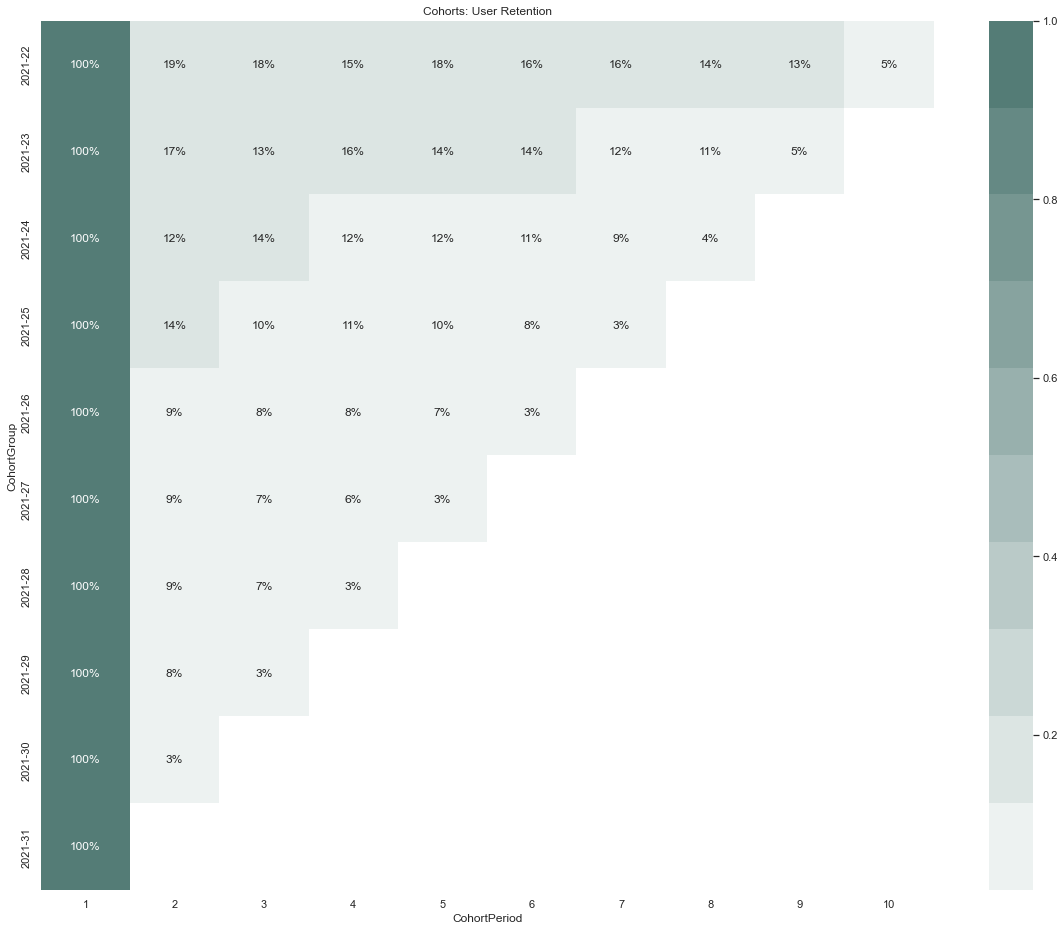

In [35]:
# 코호트 시각화 문법입니다
# cmap 에 아까 저장해놓은 커스텀 팔레트 써주시면 됩니다!
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(20, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T,cmap = Z, mask=user_retention.T.isnull(), annot=True, fmt='.0%');